In [1]:
#Import Dependencies
#pandas dataframes and statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#curve fitting
from scipy.stats import linregress
#CSV usage
import os
import csv
import pathlib

In [2]:
#US Region Breakdown
north = ['CT','ME','MA','MO','NE','NH','NJ','NY','PA','RI','VT']
west = ['AZ','CO','CA','ID','MT','NM','NV','OR','UT','WA','WY']
mid = ['IL','IN','IA','KS','MI','MN','ND','OH','SD','WI']
south = ['AL','AR','DE','FL','GA','KY','LA','MD','MS','NC','OK','SC','TN','TX','VA','WV']

In [3]:
#Import Consumption Data
Consumption_df = pd.read_csv('All_Regions_Energy_Usage_By_Month.csv') 
Consumption_df.sort_values(by = 'Unnamed: 0', ascending = True, inplace = True)

#Grab months as an index list for scatterplots
months = Consumption_df.iloc[:, 0]

#Display Dataframe
Consumption_df.head()

,Unnamed: 0,North,South,Mid-West,West
250,200101,67762.764,291202.581,50765.453,158273.239
249,200102,62619.857,240128.202,48311.601,147948.697
248,200103,76004.610,281185.116,50441.263,157238.994
247,200104,64968.313,310277.476,45294.307,150900.382
246,200105,82656.822,337370.751,49427.529,159738.500


In [4]:
#Import Energy Price Data
Price_df = pd.read_csv('price_per_state.csv') 
Price_df.sort_values(by = 'Date (YYYY/MM)', ascending = True, inplace = True)

#Create Region Dataframes and add them together to create regional dataframe
#Create DataFrames
north_df = Price_df[north] 
south_df = Price_df[south] 
mid_df = Price_df[mid] 
west_df = Price_df[west] 

#compile regions into single dataframe to get average of monthly data for regions
total_columns = ['North','South','Mid-West', 'West']
summed_regions = [north_df.mean(axis=1).values,south_df.mean(axis=1).values,mid_df.mean(axis=1).values,west_df.mean(axis=1).values]

totalPrice_df = pd.DataFrame(summed_regions).T
totalPrice_df.columns = total_columns
totalPrice_df.index = months

totalPrice_df.head()

,North,South,Mid-West,West
Unnamed: 0,,,,
200101,9.462727,5.983750,5.806,5.685455
200102,9.319091,5.977500,5.944,6.065455
200103,9.424545,6.121250,5.986,6.118182
200104,9.413636,6.110625,6.028,6.289091
200105,9.320000,6.222500,6.242,6.511818


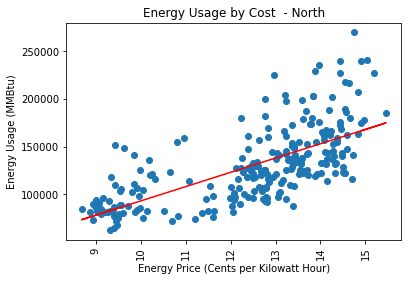

In [5]:
#Create price trendlines by Region
#North
price_North = totalPrice_df['North']
usage_North = Consumption_df['North']
plt.scatter(price_North,usage_North)

#Because we aren't comparing ordered values, we use numpy to create a polyfit instead of using linear regression (our values are not linear)
fit = np.polyfit(price_North,usage_North,1)
regress_values_North = np.poly1d(fit) #1 dimensional polynomial object

#Plot the graph
plt.plot(price_North,regress_values_North(price_North),"r-")
plt.title('Energy Usage by Cost  - North')
plt.xlabel('Energy Price (Cents per Kilowatt Hour)')
plt.ylabel('Energy Usage (MMBtu)')
plt.xticks(rotation=90)
plt.show()

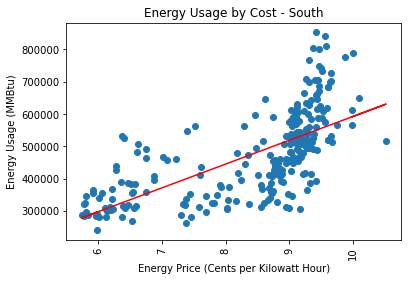

In [6]:
#Create price trendlines by Region
#South
price_South = totalPrice_df['South']
usage_South = Consumption_df['South']
plt.scatter(price_South,usage_South)

#Because we aren't comparing ordered values, we use numpy to create a polyfit instead of using linear regression (our values are not linear)
fit = np.polyfit(price_South,usage_South,1)
regress_values_South = np.poly1d(fit) #1 dimensional polynomial object

#Plot the graph
plt.plot(price_South,regress_values_South(price_South),"r-")
plt.title('Energy Usage by Cost - South')
plt.xlabel('Energy Price (Cents per Kilowatt Hour)')
plt.ylabel('Energy Usage (MMBtu)')
plt.xticks(rotation=90)
plt.show()

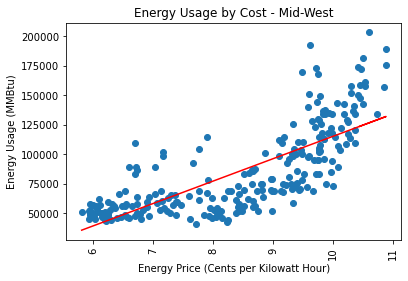

In [7]:
#Create price trendlines by Region
#Mid
price_Mid = totalPrice_df['Mid-West']
usage_Mid = Consumption_df['Mid-West']
plt.scatter(price_Mid,usage_Mid)

#Because we aren't comparing ordered values, we use numpy to create a polyfit instead of using linear regression (our values are not linear)
fit = np.polyfit(price_Mid,usage_Mid,1)
regress_values_Mid = np.poly1d(fit) #1 dimensional polynomial object

#Plot the graph
plt.plot(price_Mid,regress_values_Mid(price_Mid),"r-")
plt.title('Energy Usage by Cost - Mid-West')
plt.xlabel('Energy Price (Cents per Kilowatt Hour)')
plt.ylabel('Energy Usage (MMBtu)')
plt.xticks(rotation=90)
plt.show()

 
1.124e+04 x + 6.327e+04


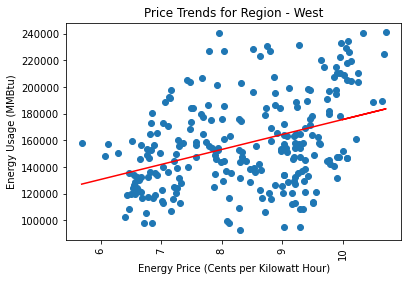

In [10]:
#Create price trendlines by Region
#West
price_West = totalPrice_df['West']
usage_West = Consumption_df['West']
plt.scatter(price_West,usage_West)

#Because we aren't comparing ordered values, we use numpy to create a polyfit instead of using linear regression (our values are not linear)
fit = np.polyfit(price_West,usage_West,1)
regress_values_West = np.poly1d(fit) #1 dimensional polynomial object

#Plot the graph
plt.plot(price_West,regress_values_West(price_West),"r-")
plt.title('Energy Usage by Cost - West')
plt.xlabel('Energy Price (Cents per Kilowatt Hour)')
plt.ylabel('Energy Usage (MMBtu)')
plt.xticks(rotation=90)
plt.show()

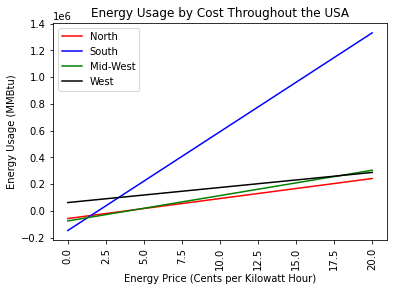

In [36]:
#Create trending graph for all regions
#Set x to limits
x = np.linspace(0,20)

plt.plot(x,regress_values_North(x), "r-", label='North')
plt.plot(x,regress_values_South(x), "b-", label='South')
plt.plot(x,regress_values_Mid(x), "g-", label='Mid-West')
plt.plot(x,regress_values_West(x), "k-", label='West')
plt.title('Energy Usage by Cost Throughout the USA')
plt.xlabel('Energy Price (Cents per Kilowatt Hour)')
plt.ylabel('Energy Usage (MMBtu)')
plt.xticks(rotation=90)
plt.legend()
plt.show()